# Homework 1: Linear Systems Part I

## General Instructions
 
* To pass this assignment requires to complete the present Jupyter notebook by
    + providing correct answers to all the theoretical exercises, and by
    + providing complete and runnable computer code producing the correct results to all the computational problems.

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.
* Please provide also a short summary and discussion of your results 
  including the requested output (e.g., tables, graphs etc.).

* Up to 3 students can jointly submit the solutions (4 students if at
  least one is an exchange student) **Only 1 student from each group** 
  is supposed to submit them.  

##### Deadline for submission of your solutions is **5th of September**.


###  Happy coding!

### Useful code snippets

We provide a few of code snippets to get you
started in Python. Three dots $\ldots$ indicate places where you have
to fill in code. We start with importing the necessary scientific libraries
and define a name alias for them.

In [1]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

## Problem 1
Provide a complete proof of Theorem 2 from Lecture 2,
following the outline provided there. 

I will restate some necessary results to begin with for the sake of completeness.

*Definition. (Leading Principal Submatrix)* Let $A \in \mathbf R^{n \times n}$. The *leading principal submatrix of order $1 \leq k \leq n$* is the $k \times k$ matrix $\mathrm{LP}_k(A)$ whose elements are the upper left-most $k \times k$ submatrix of $A$.

*Theorem.* Let $A \in \mathbf R^{n\times n}$ such that $\forall k, \mathrm{LP}_k(A)$ invertible. Then $\exists L$ unit lower triangular$, U$ upper triangular, such that $LU = A$.

*Proof. (By induction)*

*$n = 2$. (base case, because $n=1$ is trivial)*

Let
$$
A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}, \quad
L = \begin{pmatrix} 1 & 0 \\ m & 1 \end{pmatrix}, \quad
U = \begin{pmatrix} u & v \\ 0 & \eta \end{pmatrix}.
$$

It is sufficient to show that

$$
A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}
  = \begin{pmatrix} u & v \\ mu & mv + \eta \end{pmatrix}
  = LU
$$

for any $A$ that satisfies the criterion, i. e. that

$$\begin{array}{lcl}
    a & = & u \\
    b & = & v \\
    c & = & mu \\
    d & = & mv + \eta
\end{array}$$

has a solution. This is straight forward,
$$
u = a, \quad v = b, \quad m = {c \over u}, \quad \eta = d - mv,
$$
but note that this works just because by assumption $a \neq 0$, since the $1\times 1$ matrix $(a) = \mathrm{LP}_1(A)$ has an inverse, and the zero-matrix is singular.


*$n = k$ (inductive step)*

Strategy: Assuming a matrix $A \in \mathbb R^{n\times n}$ that fits the criterion has an LU-decomposition,
prove that a matrix $A' \in \mathbb R^{(n+1)\times (n+1)}$ that also fits thre criterion *also* has an LU-decomposition.


Let $A \in \mathbb R^{(n+1) \times (n+1)}$. Write $\hat \cdot = \mathrm{LP}_n(\cdot)$ as a shorthand.
$$
A = \begin{pmatrix} \hat A & \vec b \\ \vec c ^T & d \end{pmatrix}
$$
and make the ansatz
$$
L = \begin{pmatrix} \hat L & \vec 0 \\ \vec m ^T & 1 \end{pmatrix} ,\quad
U = \begin{pmatrix} \hat U & \vec v \\ \vec 0 & \eta \end{pmatrix}
$$
we need to show that
$$
A = \begin{pmatrix} \hat L \hat U    & \hat L \vec v \\
                    \vec m ^T \hat U & \vec m \cdot \vec v + \eta \end{pmatrix}
  = LU
$$
is possible wehatever $A$ is, i. e.
$$\begin{array}{lcl}
    \hat A    & = & \hat L \hat U \\
    \vec b    & = & \hat L \vec v \\
    \vec c ^T & = & \vec m ^T \hat U \\
    d & = & \vec m \cdot \vec v + \eta
\end{array}$$
Note that $\hat A$ *does* have an LU-decomposition $\hat L \hat U$, by the induction hypothesis. Note also that $\hat L$ and $\hat U$ are both invertible, (their triangular
shape makes it trivial to see that the columns are all linearly independent)
and thus we can write
$$
\vec v = \left(\hat L ^{-1} \right)\vec b ,\quad
\vec m ^T = \vec c ^T \left(\hat U ^{-1}\right) ,\quad
\eta = d - \vec m \cdot \vec v
$$
to obtain the rest of the necessary values.

## Problem 2

Given matrix $A \in \mathbb{R}^{n,n}$ and $\boldsymbol{b} \in \mathbb{R}^n$,
the goal of this problem set is to compute the solution $\boldsymbol{x}$
to the linear system $A \boldsymbol{x} = \boldsymbol{b}$ numerically
by implementing the algorithms $A = LU$ factorization (whenever possible), and the backward and forward substitution steps in ```Python```.

As a preliminary step, please make sure that you have import ```numpy```  as ```np``` by executing the cell right under "Useful code snippets".

**a)** Implement a ```Python``` function ```forward_sub```:

In [2]:
def forward_sub(L, b):
    """Given a lower triangular matrix L and right-side vector b,
    compute the solution vector y solving Ly = b."""
    
    # just making sure
    m, n = L.shape
    assert m == n
    
    y = np.zeros(n)
    for i in range(n):
        # for each row in L, starting from the top
        Lij = L[i, :i]  # elements in the current row, left of the diag
        Lii = L[i, i]   # the diagonal element.
        y[i] = (b[i] - Lij.dot(y[:i])) / Lii
    return y

**b)** Next, implement a ```Python``` function ```backward_sub```:

In [3]:
def backward_sub(U, y):
    """Given a lower triangular matrix U and right-side vector y,
    compute the solution vector x solving Ux = y."""
    
    m, n = U.shape
    assert m == n
    
    # find x s. t. Ux = y
    x = np.zeros(n)
    for k in range(n):
        i = n - k - 1 # starting from the bottom this time
        Uij = U[i, i:]  # elements on the current row, right of the diag
        Uii = U[i, i]   # the diagonal element.
        x[i] = (y[i] - Uij.dot(x[i:])) / Uii
    return x

**c)** Now, implement a Python function which computes for a given matrix $A \boldsymbol{R}^{n,n}$ the $LU$ factorization of $A = LU$ ((if possible).
You can either base your implemenentation on the Banachiewicz or Crout method (explain in Lecture 3) or any method
you might dig up from the literature.
If you want, you can take some inspiration from the reference **YEB**, Chapter 3.3, see Program 4, 5, 6.

If the factorization fails without permutating $A$, you should at least be so kind
and raise an ```Exception```, see [Python 3 tutorial, 8. Errors and Exceptions](
https://docs.python.org/3/tutorial/errors.html#errors-and-exceptions).
More specifically, you can simply raise an [NotImplementedError](https://docs.python.org/3/library/exceptions.html#NotImplementedError) exception.

Of course, you can also implement the full $PA = LU$ decomposition if you don't want to throw Exceptions around :).

In [4]:
def lu_factor(A):
    # Naïve LU-Decmposition as described by Cormen et. al.,
    # with the caveat that the book modifies A in a nested loop,
    # so i took the logic out of the loops and used the numpy
    # dot product to accomplish the same thing withot modifying A.
    
    # (the book uses a loop and sums products l*u of values
    #  from L and U, and this can be accomplished with .dot() )
    
    # The book essentially computes these dot products and stores
    # then back into A, and apparently this turns A into its schur 
    # complement, which im sure is useful, but we dont need it in
    # this exercise, so i'd rather not annoy myself more than necessary
    # by modifying A, because then running the function twice gives
    # different answers...
    
    m, n = A.shape
    assert m == n
    
    L = np.diag(np.ones(n))
    U = np.zeros((n,n))
    
    for k in range(n):
        U[k, k]  = (A[k, k] - L[k, :k].dot(U[:k, k])) / L[k, k]
        
        for i in range(k+1, n):
            U[k, i]  = (A[k, i] - L[k, :k].dot(U[:k, i])) / L[k, k]

        for i in range(k+1, n):
            L[i, k]  = (A[i, k] - L[i, :k].dot(U[:k, k])) / U[k, k]

    return L, U

**d)** Next, combine the Python functions you just implemented in a)-b) to provide
solver for the linear system $A \boldsymbol{x} = \boldsymbol{b}$ based on
a given $A = LU$ factorization. 

In [5]:
def lu_solve(L, U, b):
    # i think there was a mistake here ?
    # surely Ax = b -> (LU)x = b -> L(Ux) = b
    # so then y = Ux -> Ly = b which is what needs to be solved ?
    
    # Step 1: Solve Ly = b using forward substitution
    y = forward_sub(L, b)
    
    # Step 2: Solve Ux = y using backward substitution
    x = backward_sub(U, y)
    
    return x

**e)** Finally, write a ```linear_solve``` function  by simply combining your ```lu_factor``` and ```lu_solve```. 

In [6]:
def linear_solve(A, b):
    L, U = lu_factor(A)
    x = lu_solve(L, U, b)
    return x

**f)** Use you brand new `linear_solve` function to compute the solution to a non-trivial linear system. Here non-trivial means that $n > 4$ :) and a non-zero right-hand side $\boldsymbol{b}$.

*Hint*: To check whether your code computes the "exact" result, you can use the 
method of **manufactured solution**. In the case of linear systems $A \boldsymbol{x} = \boldsymbol{b}$ this means that for **given/chosen** matrix $A$ and solution vector $\boldsymbol{x}$, you simply compute the resulting right-hand side vector 
$\boldsymbol{b} = A \boldsymbol{x}$ to construct an example where you know the solution.
When you now solve $A\boldsymbol{x} = \boldsymbol{b}$ starting from $A$, $\boldsymbol{b}$, your implementation should return the correct $\boldsymbol{x}$.

In [7]:
A = np.array([[1,2,3,-4],
              [-2,3,4,5], 
              [3,-4,5,6], 
              [4,5,-6,7]])

x = np.array([7,-3,3,5])

b = A.dot(x)

In [8]:
x_sol = linear_solve(A, b)
x_sol

array([ 7., -3.,  3.,  5.])

## Problem 3

The objective of this problem set is two-fold. First, we will have an actual look 
at the complexity of the linear solver you implemented in the previous problem.
Second, we want to illustrate that the finite precision of real numbers
can matter very much in actual computations.

We start by introducing the **Hilbert Matrix** $H_n$ of order $n$ by
$$ 
(H_n)_{ij} = \dfrac{1}{i+j-1} \quad \text{for } 1 \leqslant i,j \leqslant n.
$$


The Hilbert matrix is readily available in the ```scipy.linalg``` module, so you simply
type, e.g

```python
n = 3
A = la.hilbert(n)
```
Recall that we imported the ```linalg``` module and renamed it to ```la``` via the
```python 
import scipy.linalg as la
``` 
line at the beginning of this notebook.

**a)** 
Define the trivial righ-hand side $\boldsymbol{b} = \boldsymbol{0}$
and measure the executation time for the various step in your linear_solver.
To do so you can use ```%timeit``` and ```%%timeit``` magic functions in IPython,
see [corresponding documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In a nutshell, ```%%timeit``` measures the executation time of an entire cell, while ```%timeit```
only measures only the executation time of a single line, e.g. as in

```python
%timeit my_function()
```

Note that the latter might not play well with functions returning arguments.
To this end, you can simply (re)write a linear solver in  3 lines (1 line per cell)
starting from calling your  ```lu_factor``` function and
copy-pasting the lines from Step 1 to Step 2 in the ```linear_solve()``` function.
Then use the ```%%timeit``` to measure the executation time of each cell.

To get accurate timeing results, ```timeit``` automatically runs the same code multiple
times in  a loop, and repeats that measurement a number of times.
The actual number of loops and repeats is selected automatically and will be printed out at the end. They can also be manually adjusted by using

```
%%timeit -n<number_of_loops> -r<number_of_repeats>
```


Now for $n = 500, 1000, 2000, 4000$, measure the executation time for each step in the linear solve
(factorizing, forward and backward substitution) and plot
the execution time $t$ against the number of unknowns $n$ in a $\log$-$\log$ plot,
that is, $\log(t)$ against $\log(n)$.
(Matplotlib has specific functions for log-log plotting)

**b)** Next, define a non-trivial vector $\boldsymbol{b}$ by
$$
b_i = \sum_{j=1}^n (j/(i+j-1)) 
$$
so that the **exact solution** to the lineary system $H_n \boldsymbol{x} = \boldsymbol{b}$ is
the vector $\boldsymbol{x}_{\mathrm{ex}}$  with elements $x_{\mathrm{ex},i} = i$.
Now solve the system using your ```linear_solve``` function for $n = 2, 4, 8, 16$, print the computed solution vector $\boldsymbol{x}_{\mathrm{comp}}$ and compare it with $\boldsymbol{x}_{\mathrm{ex}}$. In particular compute 

$$\|\boldsymbol{x}_{\mathrm{ex}}-\boldsymbol{x}_{\mathrm{comp}}\|_2.$$

What do you observe? Can you explain your observations?

*Hint*: It can be shown that the condition number $\kappa_2(H_n)$ scales like
$$
\kappa_2(H_n) \sim \dfrac{\left(\sqrt{2}+1\right)^{4n+4}}{2^{15/4}\sqrt{\pi n}}
\text{as } n \to  \infty.
$$

Tabulate the approximate values of $\kappa_2(H_n)$ for $n = 2, 4, 8, 16$.

This exercise was heavily inspired by Section 2.8 in **BLUB**.

In [16]:
n = 4000
A = la.hilbert(n)
b = np.zeros((n, 1))
%timeit L, U = lu_factor(A)

# seems like %timeit makes its own scope, so L, U are unavailable
L, U = lu_factor(A)

# We are not interested in the answer, so i reckon its
# okay to use b as rhs. in both runs. The operations that
# happen does not depend on the numberc values in the rhs.
%timeit forward_sub(L, b)
%timeit backward_sub(U, b)

/home/xfcebspwm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
/home/xfcebspwm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


4min 7s ± 12.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
34.3 ms ± 67.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.1 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
# times in milliseconds
times_fac = {
    500:  458.0,
    1000: 3.07 * 1000.0,
    2000: 28.6 * 1000.0,
    4000: (4 * 60 + 7) * 1000.0
}

times_fs = {
    500:  3.0,
    1000: 6.22,
    2000: 14.7,
    4000: 34.3
}

times_bs = {
    500:  3.0,
    1000: 6.32,
    2000: 13.7,
    4000: 34.1
}

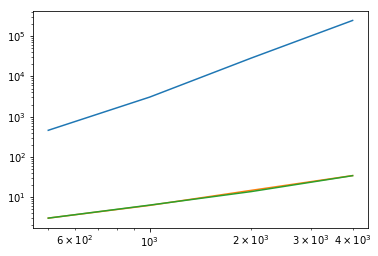

In [18]:
plt.loglog(times_fac.keys(),times_fac.values())
plt.loglog(times_fs.keys(),times_fs.values())
plt.loglog(times_bs.keys(),times_bs.values());

The lines are almost straigth, which means some kind of polynomial complexity. As we should expect (because of the additional nesting of loops) the factorization step is by far the most expensive.

In [58]:
for n in [2,4,8,16]:
    # rhs.
    # here we make the substitution k = i - 1,
    # because python is 0-indexed. this means the sum runs from 0,
    # to n - 1, corresponding to python indeces, and the - 1 in the
    # denominator in the sum is already "in k", so it goes away
    # j still runs from 1 to n because it is not used as an index,
    # so it doesnt matter
    b = np.zeros(n)
    for k in range(n):
        b[k] = sum([j/(k + j) for j in range(1, n+1)])
        
    # exact
    x = np.array([i for i in range (1, n+1)])
    
    A = la.hilbert(n)
    
    # answer with error because of division and propagation
    x_appr = linear_solve(A, b)
    
    err = la.norm(x - x_appr)
    
    print(err)

1.4895204919483639e-15
1.250173517521768e-12
2.612368118136734e-06
216.85945457400456


As we can see, the error is pretty catastrophic. With this matrix you get _a lot_ of _very small_ fractions. And when we do the pivoting, we are then dividing by small numbers, and since $ x \mapsto 1/x$ grows fast as $x \rightarrow 0$, the propagated error from the initial numerical error in $x$ has a huge impact, and after iterating, we divide the "wrong" numbers by small numbers over and over, and so the error just explodes.

### Condition number

In [22]:
for n in [2,4,8,16]:
    k = (np.sqrt(2) + 1)**(4*n + 4) / (2**(15/4) * np.sqrt(np.pi * n))
    print(n, '\t', k)

2 	 1162.4005482739578
4 	 948519.5596462524
8 	 893186722615.2314
16 	 1.1200803841874022e+24


As we can see in ythe table, the condition number also grows _very_ quickly.